<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# TRANSFORMADA DE HOUGH
### Detección de bordes es un procesamiento previo a la detección de líneas con la Transformada de Hough
### Así mismo, se incluye la creación de una Región de Interés

# Se cargan las bibliotecas necesarias

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Se carga la imagen en escala de grises, se aplica *blurring* y se obtienen los bordes con *Canny*

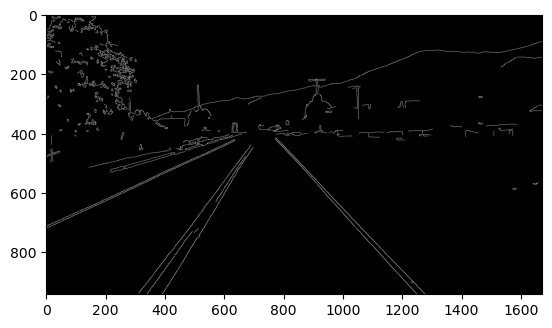

In [2]:
img_bgr = cv2.imread('image_lane_test.png')
img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_blur = cv2.GaussianBlur(img_grey,(3,3), 0, 0)
img_canny = cv2.Canny(img_blur, 40, 120) 
plt.imshow(img_canny, cmap='gray')

In [3]:
img_canny.shape

(942, 1673)

# Se crea la ROI y se aplica a la imagen en escala de grises que resulta de aplicar *Canny*

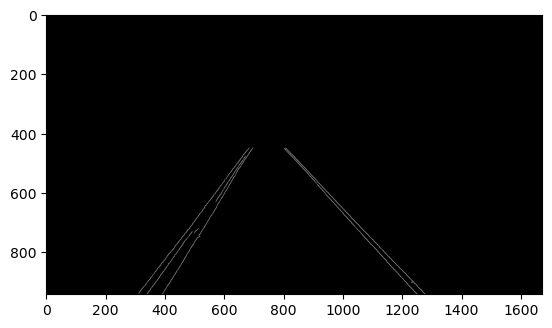

In [4]:
vertices = np.array([[(200,942),(600, 450), (900, 450), (1300,942)]], dtype=np.int32)    
img_roi = np.zeros_like(img_grey)
cv2.fillPoly(img_roi, vertices, 255)
img_mask = cv2.bitwise_and(img_canny, img_roi)
plt.imshow(img_mask, cmap='gray')

# Se aplica la Transformada de Hough

### Se eligen parámetros en función de las características de la imagen 
### Las líneas encontradas se dibujan en una imagen con fondo negro
### Usando la función *addWeighted* se hace una combinación de la imagen a color original y las líneas encontradas por la Transformada de Hough

In [5]:
rho = 2            # resolución de rho en pixeles
theta = np.pi/180  # resolución de theta en radianes 
threshold = 40     # mínimo número de votos para ser considerado una línea 
min_line_len = 50  # mínimo número de pixeles para que se forme una línea
max_line_gap = 10  # máximo espacio en pixeles entre segmentos de línea    
lines = cv2.HoughLinesP(img_mask, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
# se crea un fondo negro del tamaño de la imagen con bordes
img_lines = np.zeros((img_mask.shape[0], img_mask.shape[1], 3), dtype=np.uint8)
# se dibujan cada una de las líneas sobre la imagen con fondo negro    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(img_lines, (x1, y1), (x2, y2), [255, 0, 0], 30)
# se imprimen las líneas encontradas
print(lines)

[[[ 822  471  868  521]]

 [[ 342  940  461  775]]

 [[ 945  596 1058  713]]

 [[1031  704 1148  829]]

 [[ 393  941  576  647]]

 [[ 421  800  479  724]]

 [[ 583  583  679  456]]

 [[ 475  808  516  742]]

 [[ 892  539  954  603]]

 [[1139  799 1225  885]]

 [[ 874  526  974  640]]

 [[ 481  724  589  576]]

 [[ 654  516  692  456]]

 [[ 352  887  406  820]]

 [[1149  833 1247  938]]

 [[ 584  613  651  507]]

 [[1058  715 1124  781]]

 [[ 450  788  493  731]]

 [[ 562  671  620  570]]

 [[ 314  935  360  880]]

 [[ 619  559  653  505]]

 [[ 658  507  698  450]]

 [[ 574  597  681  454]]

 [[ 802  450  852  502]]

 [[1105  763 1158  817]]

 [[1152  836 1204  890]]

 [[ 916  565 1026  679]]

 [[ 366  869  429  789]]

 [[1201  887 1250  941]]

 [[ 803  452  863  514]]

 [[ 455  757  495  703]]]


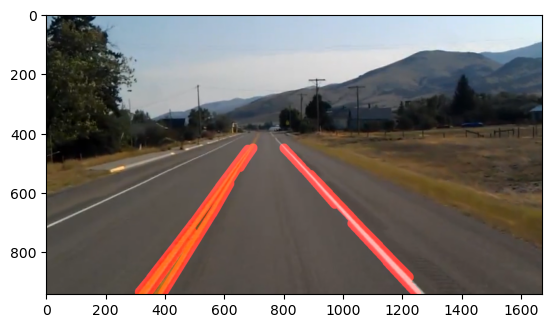

In [6]:
alpha = 1
beta = 1
gamma = 1
img_lane_lines = cv2.addWeighted(img_rgb, alpha, img_lines, beta, gamma)
plt.imshow(img_lane_lines)

# Gracias por la atención